96


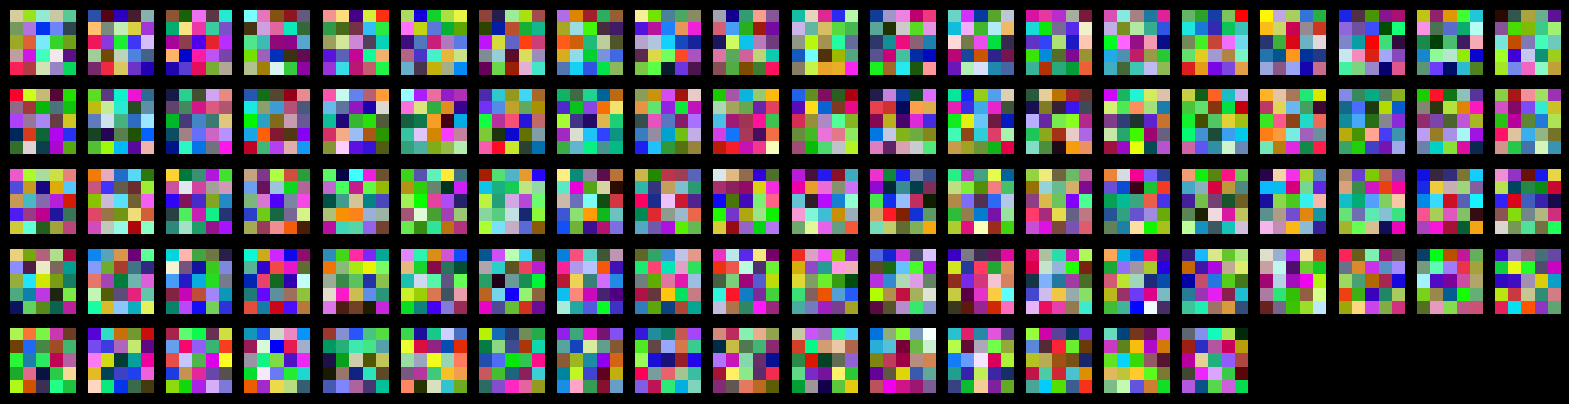

In [30]:
import torch
from model import DeepSoftHebb

# model = DeepSoftHebb(device='cpu', in_channels=1, dropout=0.0, input_size=28, neuron_centric=True, unsupervised_first=True)

# Load the model
model = torch.load('best_model.pth', map_location='cpu')
# Print the model weights 

import numpy as np
import matplotlib.pyplot as plt

# get the number of kernels in the first layer
num_kernels = model.conv1.weight.size(0)
print(num_kernels)

xaxes = num_kernels // 20 + 1
yaxes = 20
fig, axes = plt.subplots(xaxes, yaxes, figsize=(yaxes, xaxes))
# set black background  
fig.patch.set_facecolor('black')

count = 0
for i in range(xaxes):
    for j in range(yaxes):
        if xaxes == 1:
            axes[j].axis('off')
        else:
            axes[i, j].axis('off')

        if count >= num_kernels:
            continue
        img = model.conv1.weight[count].detach().cpu().numpy().transpose(1, 2, 0)
        img = (img - img.min()) / (img.max() - img.min())
        if xaxes == 1:
            axes[j].imshow(img)
        else:
            axes[i, j].imshow(img)
        count += 1


In [2]:
# print bartch normalization weights
# set black background
print(model.bn1.running_mean)
print(model.bn1.running_var)

tensor([-0.0439, -0.0688, -0.1306])
tensor([0.2343, 0.2239, 0.2592])
